# IMPORT, EXPLORE,  DROP,  RENAME COLUMNS

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('/Users/admin/Documents/Flatiron/Movie_Production_Recommendations/Lou/data/CSV_DB_Merge_V2.csv')

In [4]:
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df['production_budget'] = df['production_budget'].astype(float)

In [8]:
df.drop(['Unnamed: 0', 'foreign_gross_y', 'release_date_y', 'domestic_gross_y', 'release_date_y'], axis=1, inplace=True)

In [9]:
df.columns

Index(['title_x', 'genres', 'original_language', 'foreign_gross_x',
       'worldwide_gross', 'release_date_x', 'domestic_gross_x',
       'production_budget', 'popularity', 'vote_average', 'vote_count',
       'release_year', 'id_y', 'studio', 'averagerating', 'numvotes',
       'runtime_minutes'],
      dtype='object')

In [10]:
df['domestic_gross_x'] = df['domestic_gross_x'].astype(float)
df['foreign_gross_x'] = df['foreign_gross_x'].astype(float)

In [11]:
df.set_index('id_y')

title_x                      genres  \
id_y                                                                    
42.0               The Legend of Hercules    Action,Adventure,Fantasy   
38.0                        Baggage Claim                      Comedy   
15.0                            Moneyball       Biography,Drama,Sport   
61.0                            Hereafter       Drama,Fantasy,Romance   
44.0                       21 Jump Street         Action,Comedy,Crime   
...                                   ...                         ...   
13.0  Cloudy with a Chance of Meatballs 2  Adventure,Animation,Comedy   
18.0          Beasts of the Southern Wild     Adventure,Drama,Fantasy   
96.0                    The Expendables 3   Action,Adventure,Thriller   
51.0                             Snatched     Action,Adventure,Comedy   
94.0                           Game Night         Action,Comedy,Crime   

     original_language  foreign_gross_x  worldwide_gross release_date_x  \
id_y                                                                      
42.0                en       40104781.0       58953319.0     2014-01-10   
38.0                en        1316327.0       22885836.0     2013-09-27   
15.0                en       35695343.0      111300835.0     2011-09-22   
61.0                en       75913329.0      108660270.0     2010-10-22   
44.0                en       64364762.0      202812429.0     2012-03-12   
...                ...              ...              ...            ...   
13.0                en      154599082.0      274392649.0     2013-09-27   
18.0                en       10469386.0       23265132.0     2012-06-29   
96.0                en      170138834.0      209461378.0     2014-08-15   
51.0                en       11999999.0       57852177.0     2017-05-12   
94.0                en       48199018.0      117378084.0     2018-02-23   

      domestic_gross_x  production_budget  popularity  vote_average  \
id_y                                                                  
42.0        18848538.0         70000000.0      13.754           4.5   
38.0        21569509.0          8500000.0       8.666           5.4   
15.0        75605492.0         50000000.0      15.393           7.1   
61.0        32746941.0         50000000.0       7.886           5.9   
44.0       138447667.0         42000000.0      14.836           6.8   
...                ...                ...         ...           ...   
13.0       119793567.0         78000000.0      18.335           6.4   
18.0        12795746.0          1800000.0       7.530           6.9   
96.0        39322544.0        100000000.0      18.797           6.1   
51.0        45852178.0         42000000.0      10.920           5.3   
94.0        69179066.0         37000000.0      19.459           6.9   

      vote_count  release_year   studio  averagerating  numvotes  \
id_y                                                               
42.0       805.0        2014.0     LG/S            4.2     50352   
38.0       127.0        2013.0     FoxS            5.1      8296   
15.0      2255.0        2011.0     Sony            7.6    326657   
61.0       848.0        2010.0       WB            6.5     87288   
44.0      6527.0        2012.0     Sony            7.2    477771   
...          ...           ...      ...            ...       ...   
13.0      1679.0        2013.0     Sony            6.4     81010   
18.0       605.0        2012.0     FoxS            7.3     77440   
96.0      2876.0        2014.0      LGF            6.1    156432   
51.0       495.0        2017.0      Fox            4.5     29997   
94.0      2756.0        2018.0  WB (NL)            7.0    163279   

      runtime_minutes  
id_y                   
42.0             99.0  
38.0             96.0  
15.0            133.0  
61.0            129.0  
44.0            109.0  
...               ...  
13.0             95.0  
18.0             93.0  
96.0            126.0  
51.0             90.0  
94.0       

In [13]:
df = df.rename(columns={'id_y': 'id', 'title_x': 'title', 'numvotes': 'votes','release_date_x': 'release_date', 
                        'domestic_gross_x': 'domestic_gross', 'foreign_gross_x': 'foreign_gross', 
                        'averagerating': 'average_rating'})

In [14]:
df['domestic_gross'].isna().any()

False

In [15]:
cols = df.columns.tolist()
cols

['title',
 'genres',
 'original_language',
 'foreign_gross',
 'worldwide_gross',
 'release_date',
 'domestic_gross',
 'production_budget',
 'popularity',
 'vote_average',
 'vote_count',
 'release_year',
 'id',
 'studio',
 'average_rating',
 'votes',
 'runtime_minutes']

In [16]:
cols = ['id', 'title', 'genres', 'release_year', 'release_date', 'studio', 'vote_average', 'popularity','domestic_gross', 'foreign_gross', 'production_budget', 'runtime_minutes', 'average_rating', 'votes', 'worldwide_gross','original_language']  

In [17]:
df = df[cols]

In [18]:
df
import numpy as np

# EXPLORING FOREIGN GROSS, CREATING FOREIGN- AND DOMESTIC-DOMINATED DATAFRAMES

In [19]:
df['foreign_gross'].isna().sum()

0

In [20]:
df['foreign_gross'].sample(100)

584     41196034.0
512       327302.0
14        863207.0
602    115435048.0
345     15855043.0
          ...     
860       383066.0
729     19616184.0
82      14075134.0
70      31000000.0
408     25665737.0
Name: foreign_gross, Length: 100, dtype: float64

In [21]:
test = df[df['foreign_gross'] > df['domestic_gross']]

In [23]:
foreign_gt_domestic = test

In [25]:
net = foreign_gt_domestic ['worldwide_gross'] - foreign_gt_domestic['production_budget']

foreign_gt_domestic['net'] = net

<ipython-input-25-564821536de0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_gt_domestic['net'] = net


In [26]:
grouped = foreign_gt_domestic.groupby('net')

In [28]:
foreign_gt_domestic['net'].mean()

196304219.44554454

In [224]:
foreign_gt_domestic['net'].median()

91650000.0

In [29]:
foreign_gt_domestic['net'].describe()

count    5.050000e+02
mean     1.963042e+08
std      2.594271e+08
min     -6.953398e+07
25%      2.194325e+07
50%      9.830063e+07
75%      2.773816e+08
max      1.748134e+09
Name: net, dtype: float64

In [31]:
net = df['worldwide_gross'] - df['production_budget']

df['net'] = net

In [32]:
df['net'].mean()

135923152.6820682

In [33]:
foreign_gt_domestic['net'].mean() - df['net'].mean()
#### BIG DEAL 

60381066.76347634

In [234]:
domestic_gt_foreign['net'].describe()

count    4.850000e+02
mean     5.970381e+07
std      1.085112e+08
min     -1.110000e+08
25%      5.900000e+06
50%      2.950000e+07
75%      7.470000e+07
max      1.147000e+09
Name: net, dtype: float64

In [236]:
foreign_gt_domestic

movie_id             primary_title              original_title  \
0     tt0892769  How to Train Your Dragon    How to Train Your Dragon   
2     tt1375666                 Inception                   Inception   
3     tt0435761               Toy Story 3                 Toy Story 3   
4     tt1323594             Despicable Me               Despicable Me   
5     tt1001526                  Megamind                    Megamind   
...         ...                       ...                         ...   
1080        NaN                       NaN        The Sisters Brothers   
1082  tt1981128                  Geostorm                    Geostorm   
1086  tt2296777           Sherlock Gnomes             Sherlock Gnomes   
1094  tt1389072                Downsizing                  Downsizing   
1097        NaN                       NaN  Bilal: A New Breed of Hero   

                          genres  release_year release_date_y     studio  \
0     Action,Adventure,Animation          2010     2010-03-26       P/DW   
2        Action,Adventure,Sci-Fi          2010     2010-07-16         WB   
3     Adventure,Animation,Comedy          2010     2010-06-18         BV   
4        Animation,Comedy,Family          2010     2010-07-09       Uni.   
5        Action,Animation,Comedy          2010     2010-11-05       P/DW   
...                          ...           ...            ...        ...   
1080                         NaN          2018     2018-09-21  Annapurna   
1082      Action,Sci-Fi,Thriller          2017     2017-10-20         WB   
1086  Adventure,Animation,Comedy          2018     2018-03-23       Par.   
1094                Drama,Sci-Fi          2017     2017-12-22       Par.   
1097                         NaN          2018     2018-02-02         VE   

      domestic_gross  foreign_gross  production_budget  runtime_minutes  \
0        217600000.0    277300000.0        165000000.0             98.0   
2        292600000.0    535700000.0        160000000.0            148.0   
3        415000000.0    652000000.0        200000000.0            103.0   
4        251500000.0    291600000.0         69000000.0             95.0   
5        148400000.0    173500000.0        130000000.0             95.0   
...              ...            ...                ...              ...   
1080       3100000.0     10000000.0         38000000.0              NaN   
1082      33700000.0    187900000.0        100000000.0            109.0   
1086      43200000.0     47100000.0         59000000.0             86.0   
1094      24400000.0     30600000.0         68000000.0            135.0   
1097        491000.0      1700000.0         30000000.0              NaN   

      averagerating   numvotes original_language   world_gross          net  
0               8.1   611299.0                en  4.949000e+08  329900000.0  
2               8.8  1841066.0                en  8.283000e+08  668300000.0  
3               8.3   682218.0                en  1.067000e+09  867000000.0  
4               7.7   464511.0                en  5.431000e+08  474100000.0  
5               7.3   207488.0                en  3.219000e+08  191900000.0  
...             ...        ...               ...           ...          ...  
1080            NaN        NaN                en  1.310000e+07  -24900000.0  
1082            5.3    78287.0                en  2.216000e+08  121600000.0  
1086            5.1     8030.0                en  9.030000e+07   31300000.0  
1094            5.7    74815.0                en  5.500000e+07  -13000000.0  
1097            NaN        NaN                en  2.191000e+06  -27809000.0  

[610 rows x 16 columns]

In [237]:
foreign_gt_domestic.describe()

release_year  domestic_gross  foreign_gross  production_budget  \
count    610.000000    6.100000e+02   6.100000e+02       6.100000e+02   
mean    2013.737705    8.660401e+07   1.695828e+08       7.436900e+07   
std        2.533854    9.761743e+07   1.863598e+08       6.711418e+07   
min     2010.000000    1.000000e+03   1.430000e+05       5.000000e+05   
25%     2011.000000    1.760000e+07   3.735000e+07       2.000000e+07   
50%     2014.000000    5.185000e+07   9.660000e+07       5.000000e+07   
75%     2016.000000    1.218250e+08   2.372750e+08       1.142500e+08   
max     2018.000000    6.086000e+08   9.464000e+08       4.106000e+08   

       runtime_minutes  averagerating      numvotes   world_gross  \
count       553.000000     556.000000  5.560000e+02  6.100000e+02   
mean        112.491863       6.588849  2.016425e+05  2.561868e+08   
std          19.061600       0.988812  2.090197e+05  2.771217e+08   
min          41.000000       3.200000  6.000000e+00  1.721000e+05   
25%          98.000000       6.075000  6.904725e+04  5.520000e+07   
50%         109.000000       6.600000  1.279225e+05  1.500500e+08   
75%         124.000000       7.300000  2.697850e+05  3.532750e+08   
max         180.000000       8.800000  1.841066e+06  1.405400e+09   

                net  
count  6.100000e+02  
mean   1.818178e+08  
std    2.316490e+08  
min   -7.380500e+07  
25%    1.920000e+07  
50%    9.165000e+07  
75%    2.511250e+08  
max    1.139500e+09

In [238]:
foreign_gt_domestic['net'].sort_values(ascending=False).sample(50)

416     166200000.0
284       3364000.0
189     115300000.0
941       8100000.0
781      78300000.0
930      53200000.0
576      75500000.0
309     273400000.0
751     273700000.0
1007    352200000.0
922     959800000.0
66        3737000.0
159      47100000.0
273      42000000.0
303     331200000.0
658     144800000.0
190     117900000.0
602       8200000.0
924     426100000.0
78      -15246000.0
910     208900000.0
456     -41895000.0
898     351000000.0
831      82600000.0
155     388800000.0
101      33700000.0
511     706000000.0
147       4300000.0
1073    120900000.0
160      47100000.0
426     109900000.0
618     228400000.0
341      49000000.0
784     426100000.0
534     236200000.0
295     601900000.0
487      88100000.0
505      11500000.0
786       7800000.0
42      210600000.0
167     115100000.0
798      65300000.0
770     559200000.0
938     167799999.0
743       5900000.0
300     214900000.0
637     493400000.0
785     381100000.0
669      50600000.0
356     107500000.0


In [35]:
df['worldwide_gross'].describe()

count    9.090000e+02
mean     1.936894e+08
std      2.589844e+08
min      1.728670e+05
25%      3.899355e+07
50%      9.405095e+07
75%      2.281042e+08
max      2.048134e+09
Name: worldwide_gross, dtype: float64

In [240]:
# what are qualities of the foreign-dominated films? and of the domestic-dominated? what are their respective genres? 


In [241]:
df['net'].sort_values(ascending=False).head(100)

993     1.147000e+09
1002    1.139500e+09
402     1.126400e+09
704     1.085400e+09
614     1.074800e+09
            ...     
1009    4.329000e+08
924     4.261000e+08
784     4.261000e+08
250     4.250000e+08
546     4.234000e+08
Name: net, Length: 100, dtype: float64

In [36]:
domestic_gt_foreign =  df[df.domestic_gross.gt(df.foreign_gross)]

In [38]:
domestic_gt_foreign['net'].mean()

60446819.22772277

In [39]:
domestic_gt_foreign['net'].median()

31372128.0

In [41]:
foreign_gt_domestic['net'].mean() - domestic_gt_foreign['net'].mean()
## big deal !!!

135857400.21782178

In [40]:
domestic_gt_foreign['net'].describe()

count    4.040000e+02
mean     6.044682e+07
std      1.044516e+08
min     -1.104502e+08
25%      1.030128e+07
50%      3.137213e+07
75%      7.612491e+07
max      1.148258e+09
Name: net, dtype: float64

# PLOTTING FOREIGN GROSS-DOMINATED VS DOMESTIC-GROSS DOMINATED

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

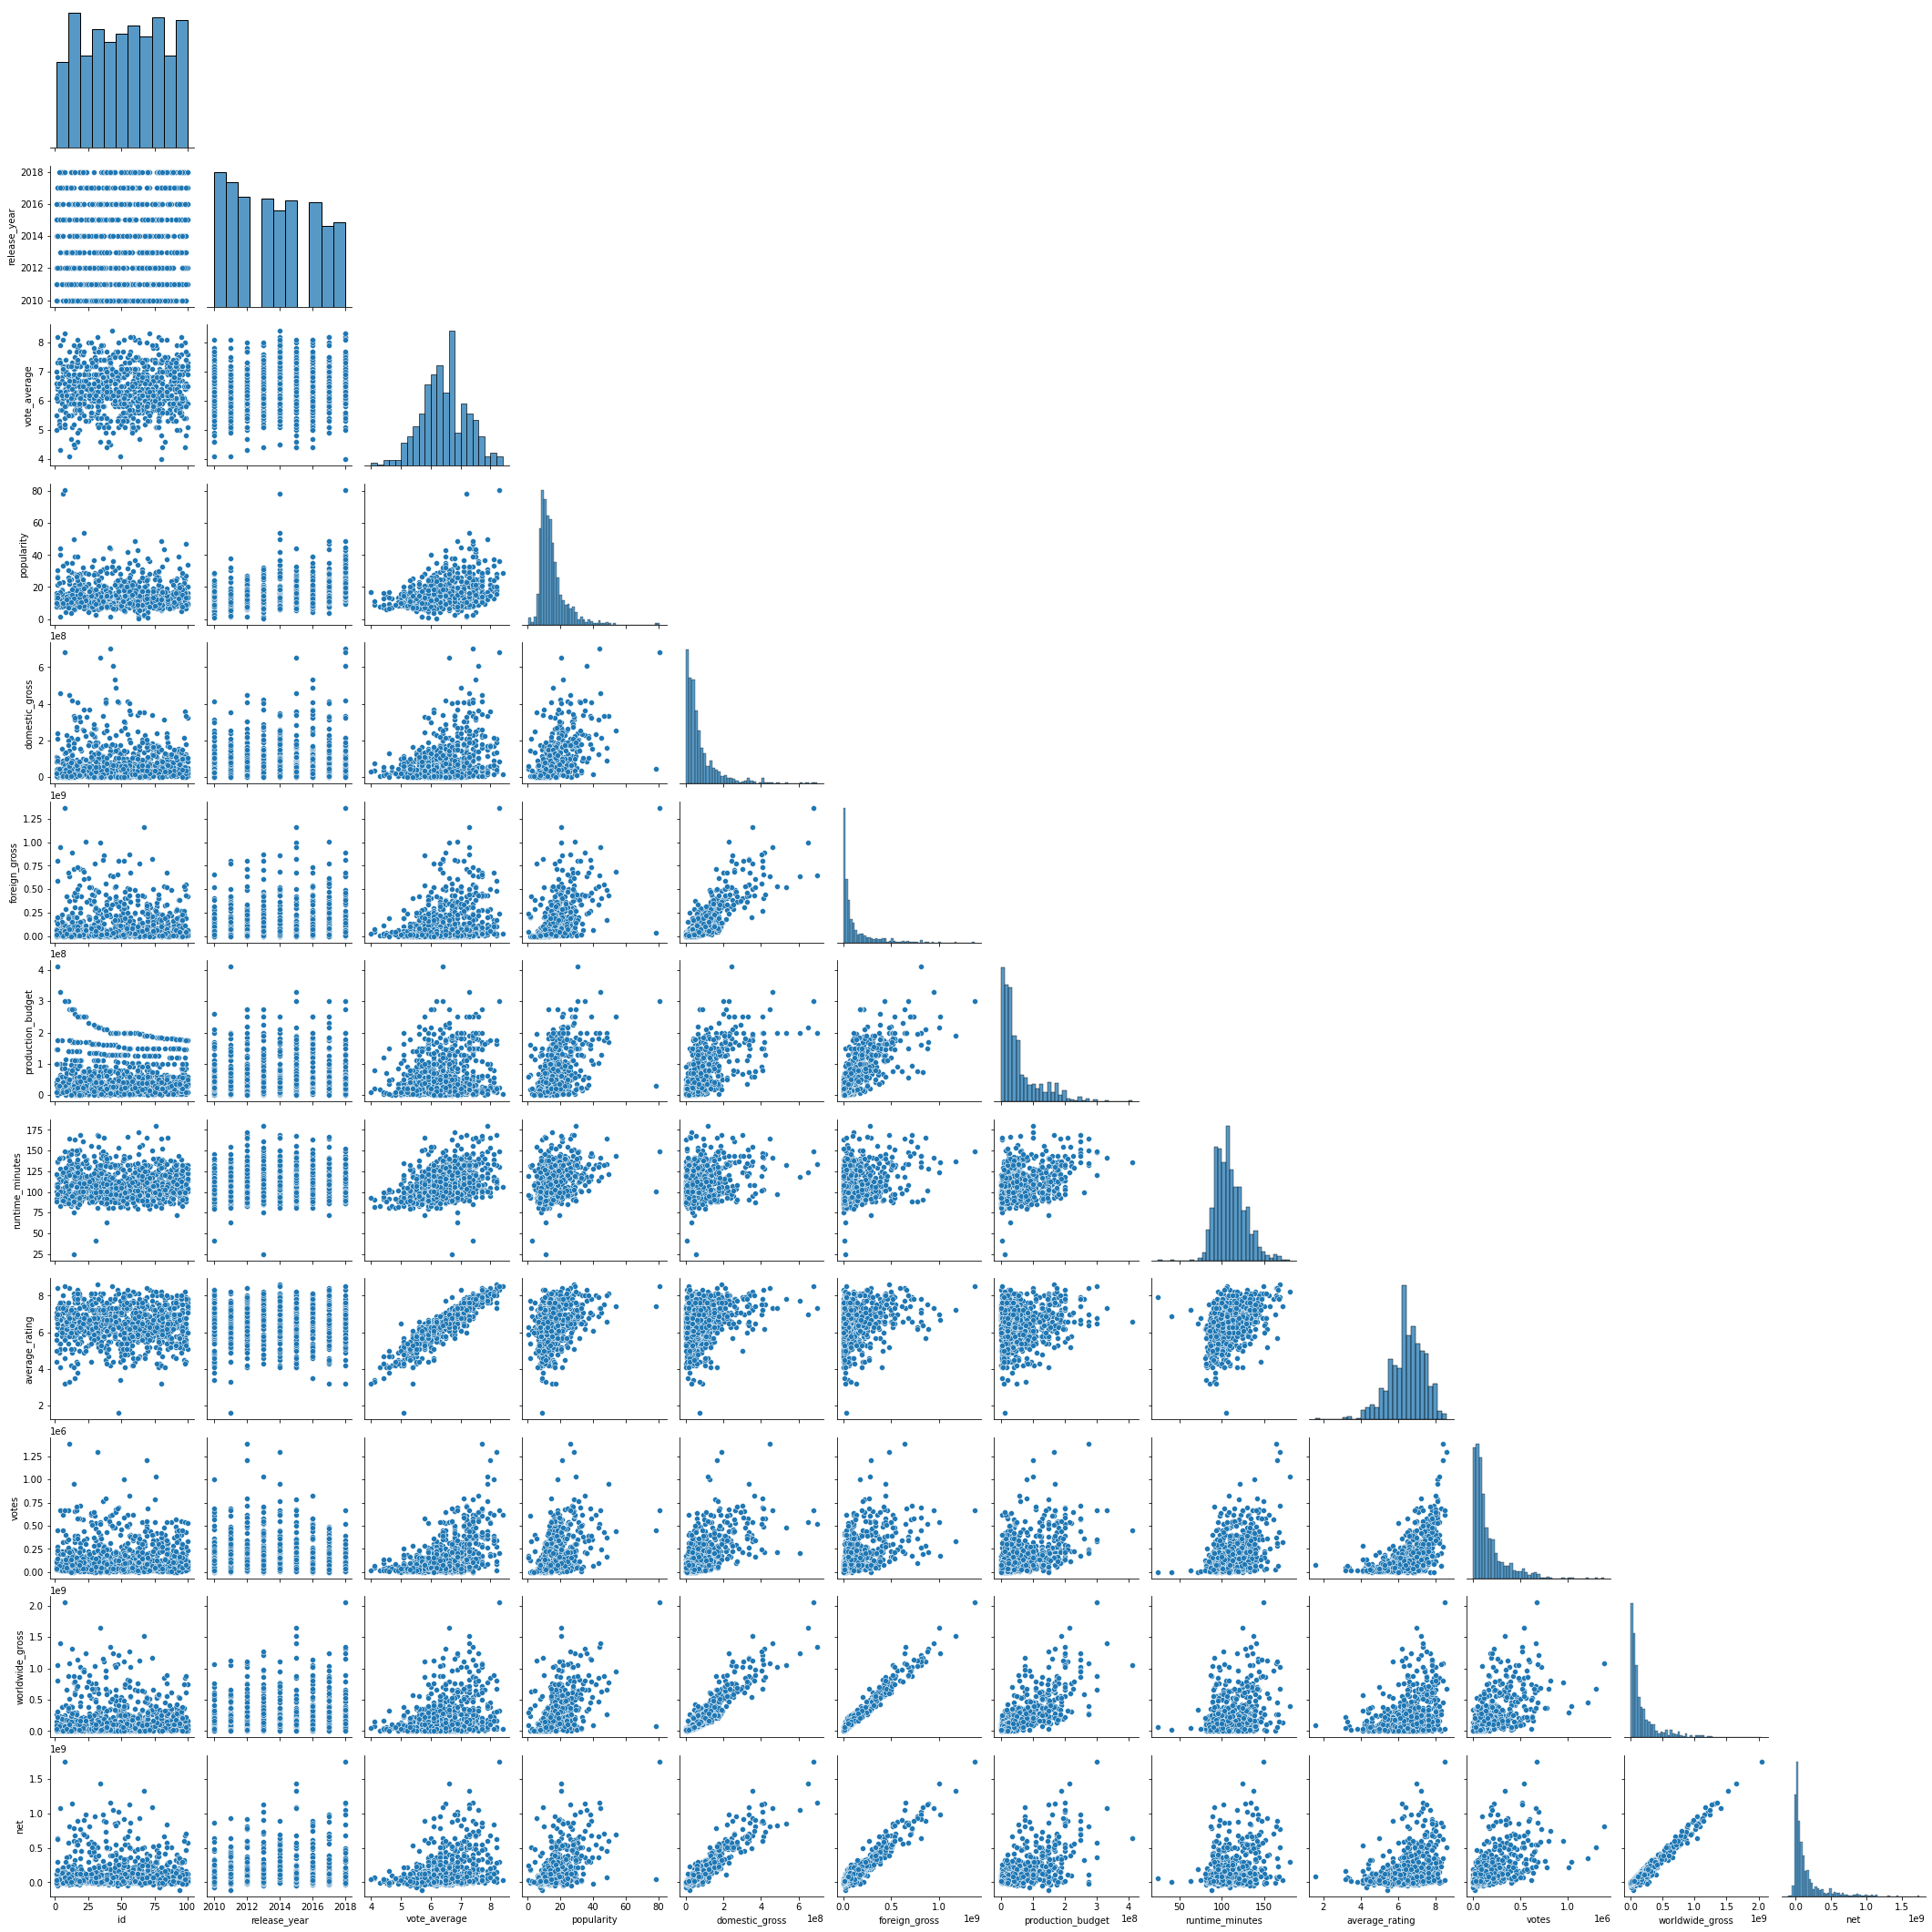

In [46]:
sns.pairplot(df, corner = True)
plt.show()

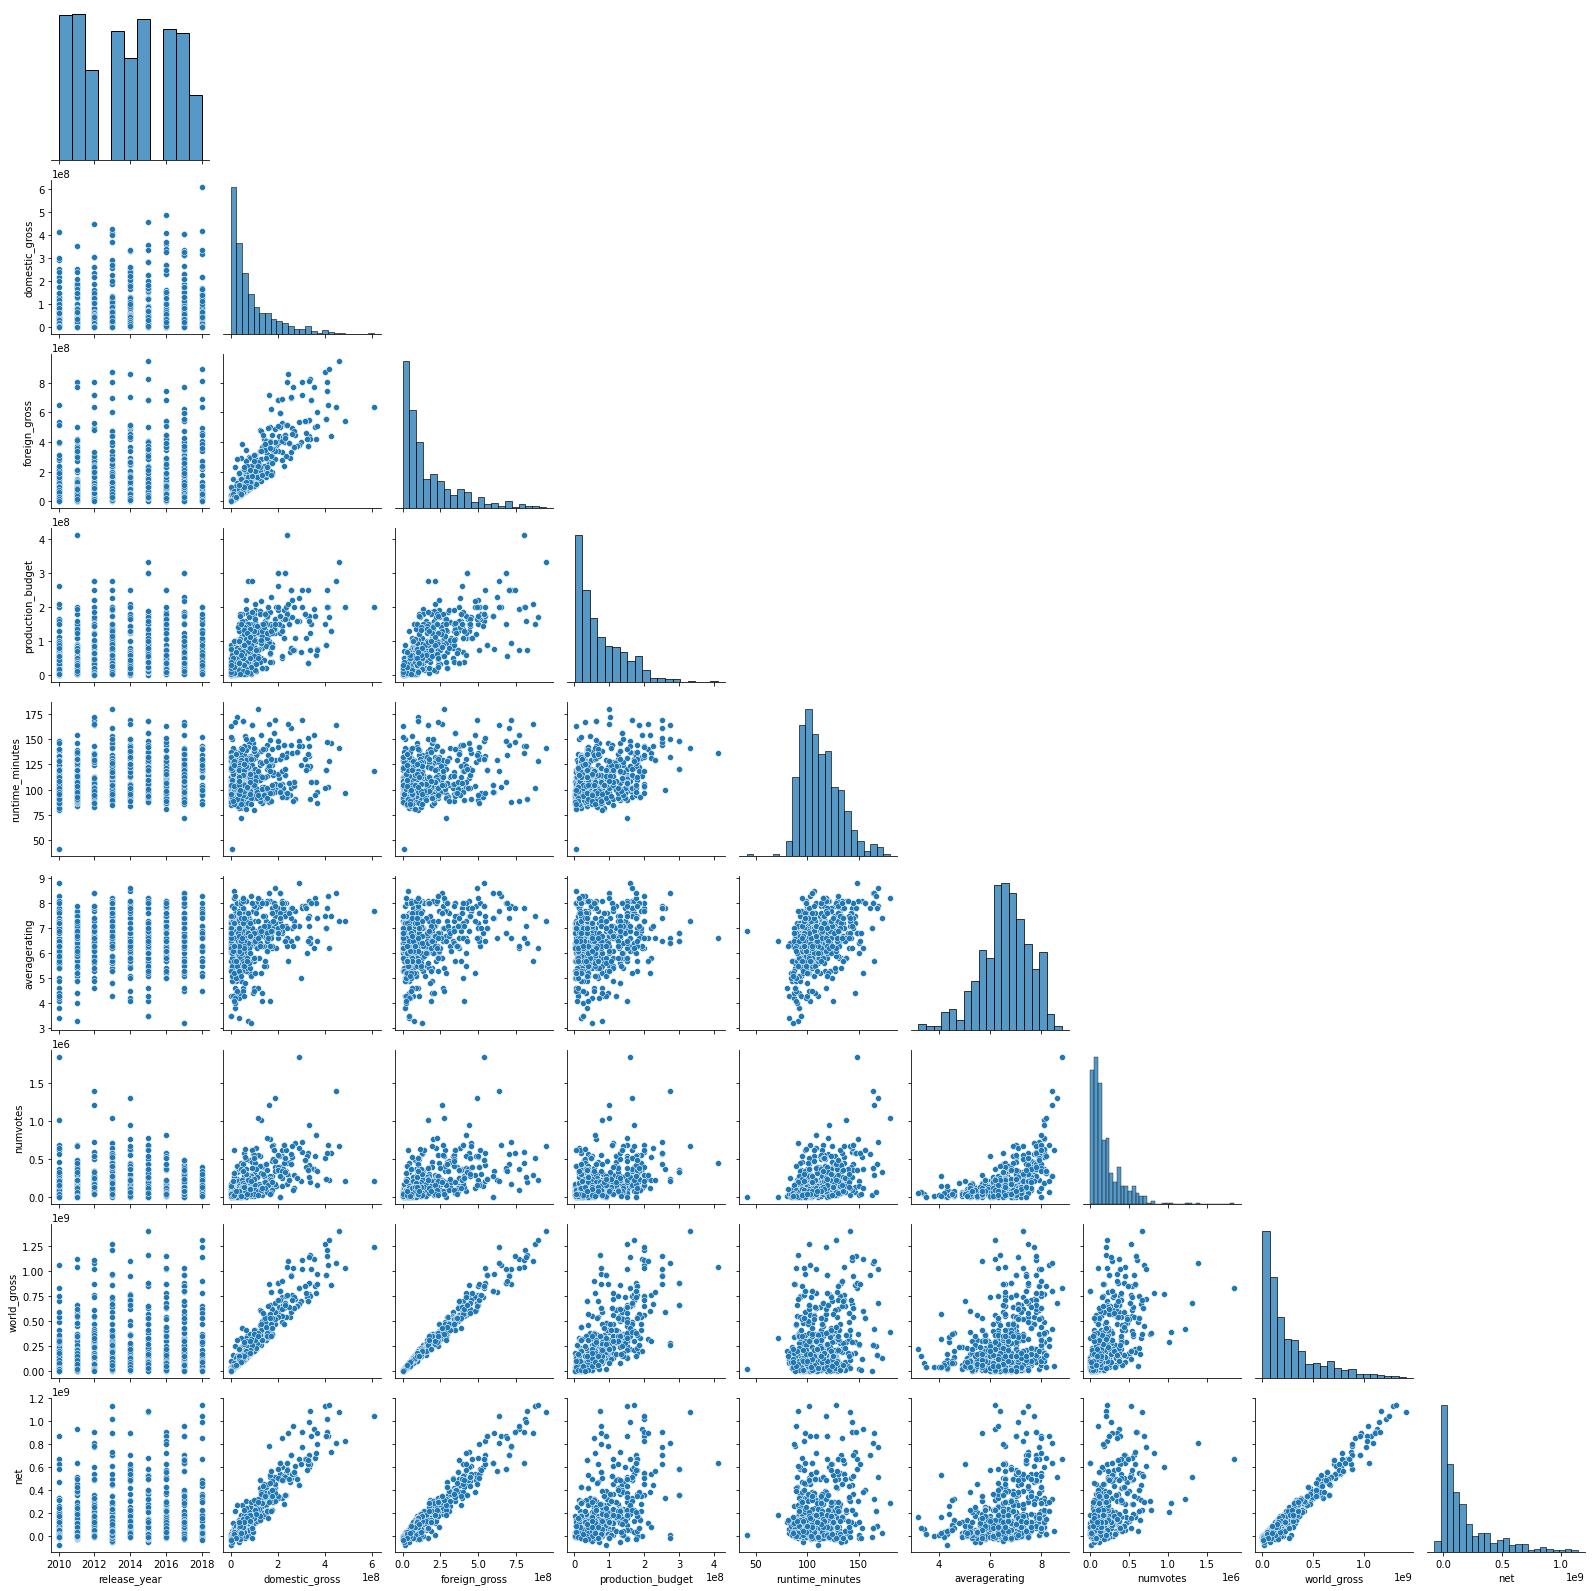

In [246]:
sns.pairplot(foreign_gt_domestic, corner=True)

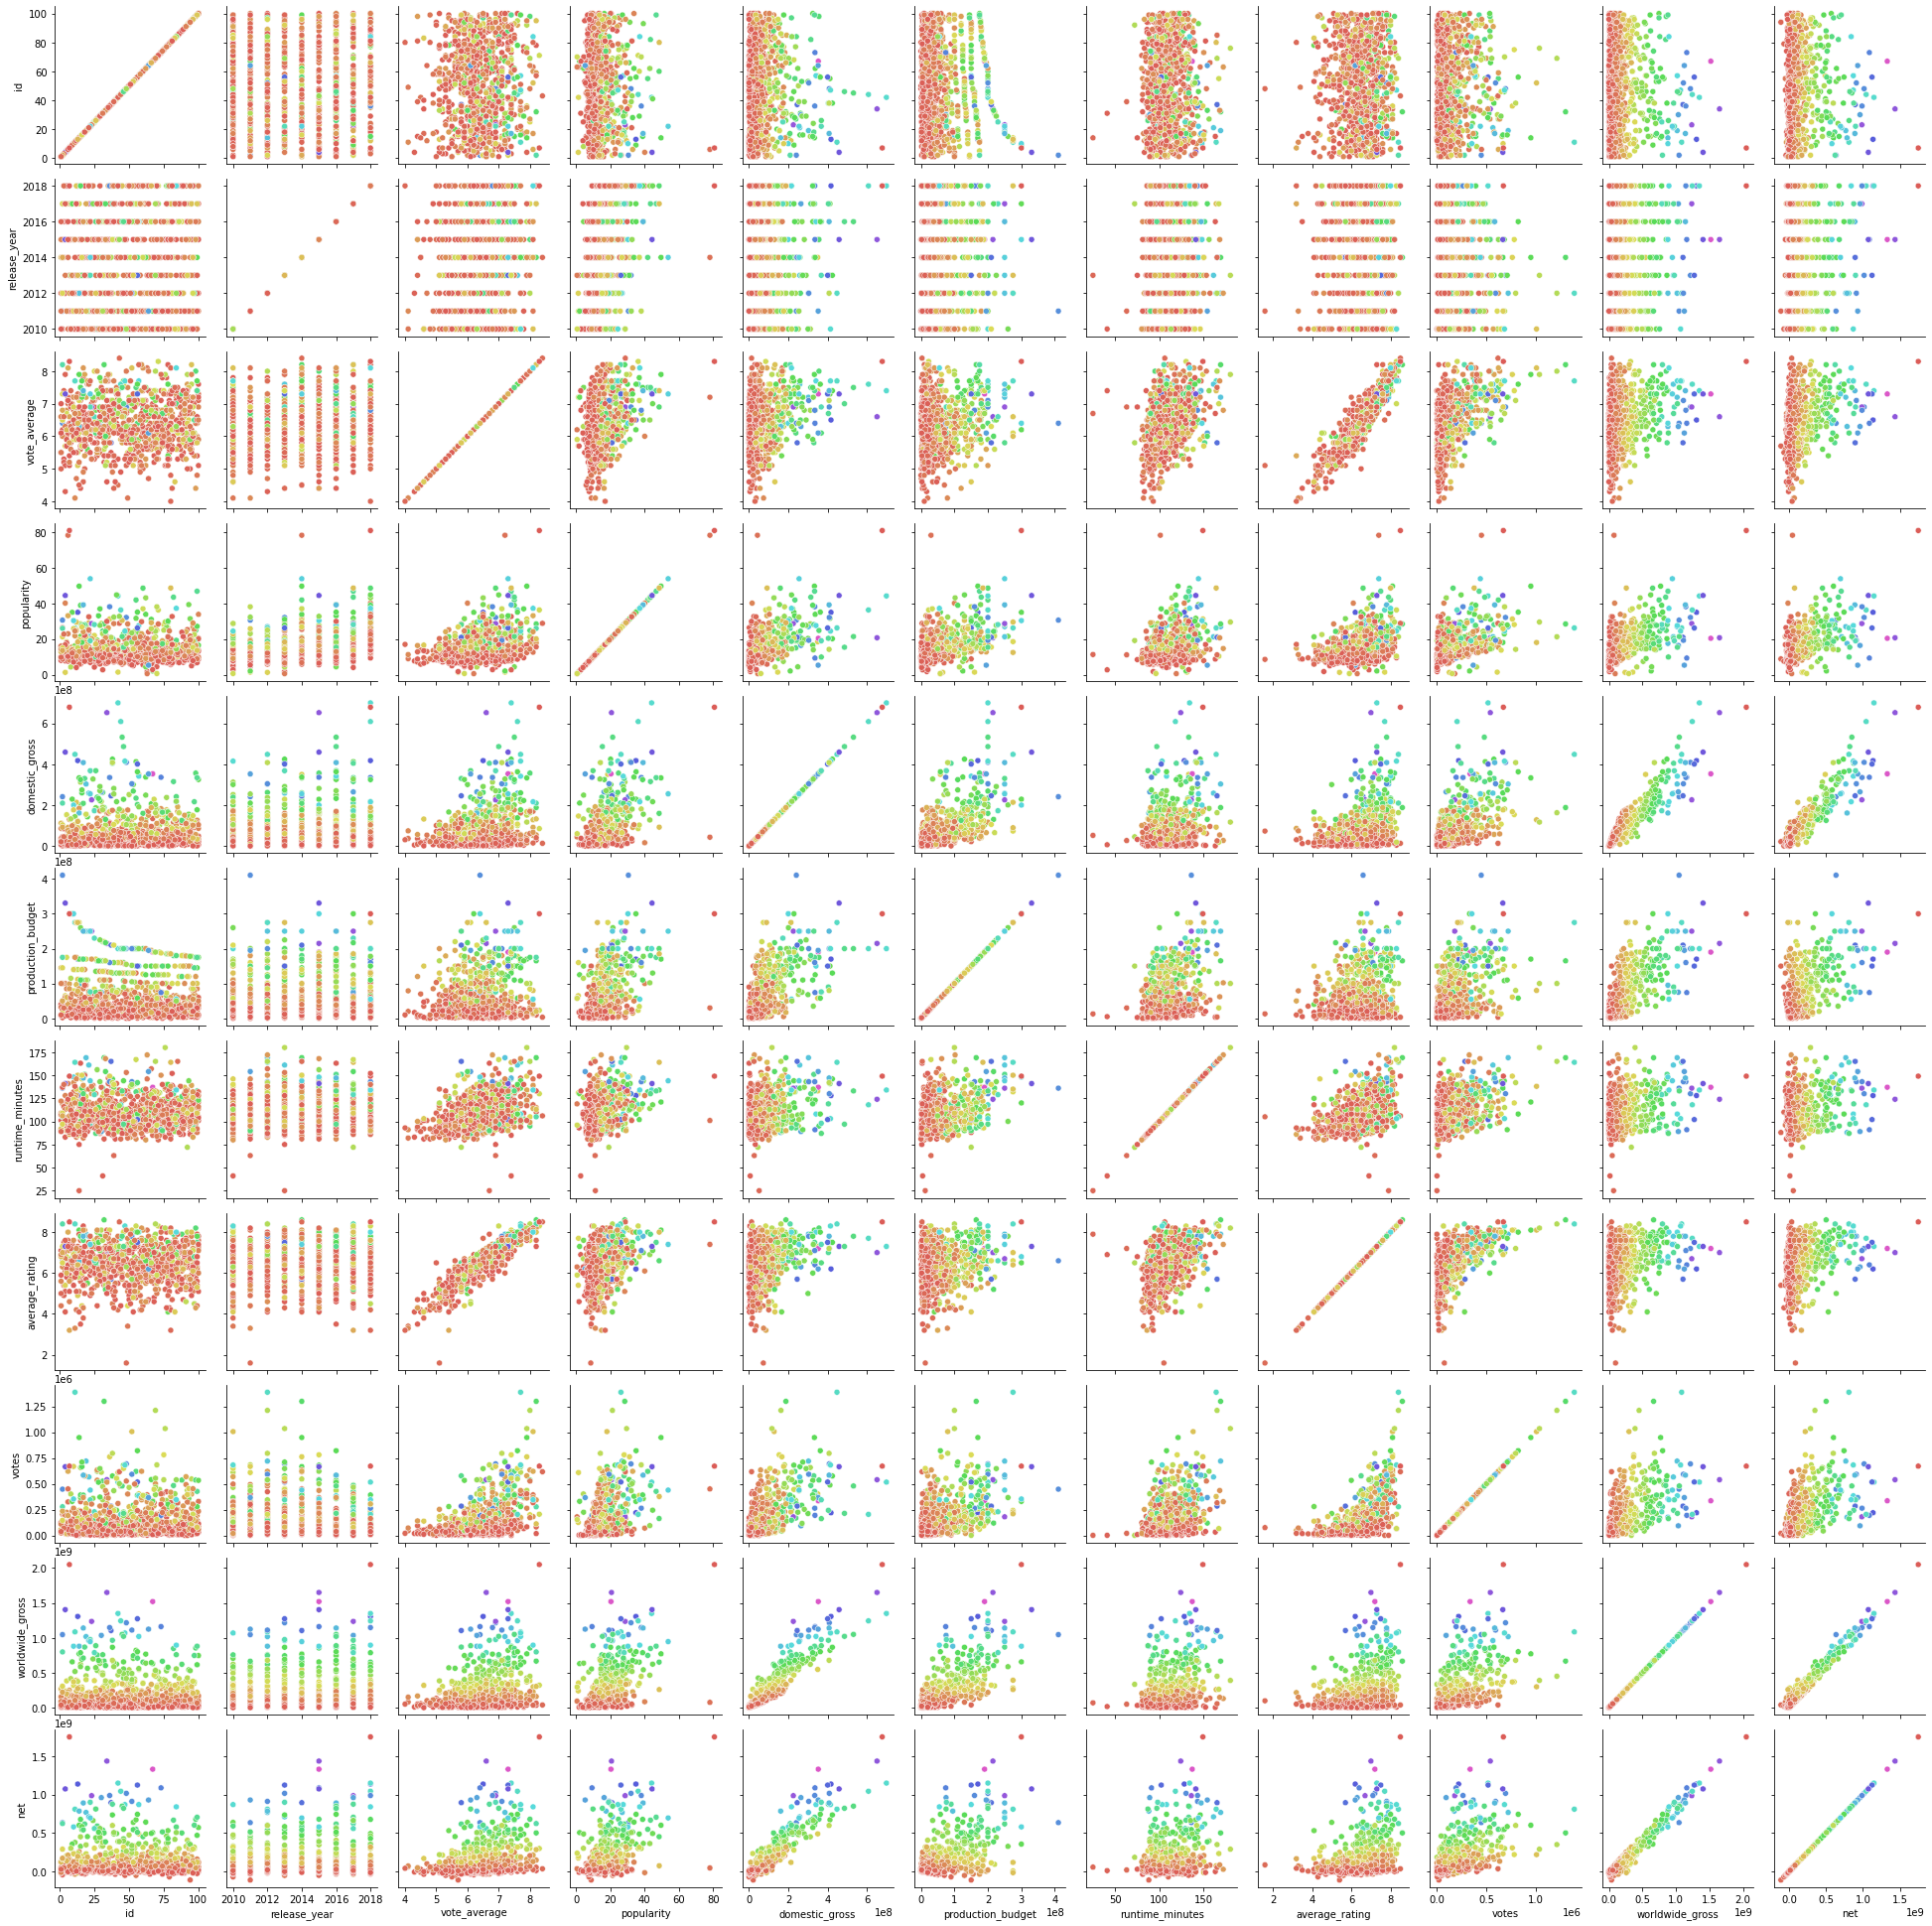

In [48]:
sns.PairGrid(df, hue='foreign_gross', palette='hls').map(sns.scatterplot)
plt.show()


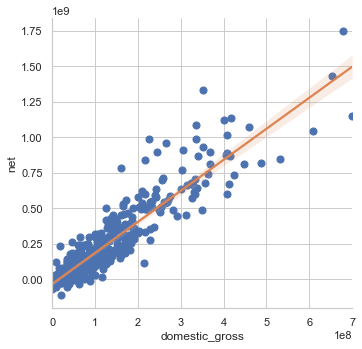

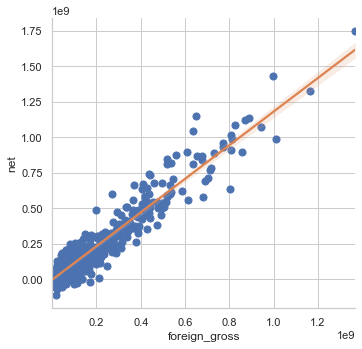

In [132]:

sns.lmplot(x="domestic_gross", y="net", line_kws={"color": "C1"}, data=df, x_estimator=np.mean)
sns.lmplot(x="foreign_gross", y="net", line_kws={"color": "C1"}, data=df, x_estimator=np.mean)




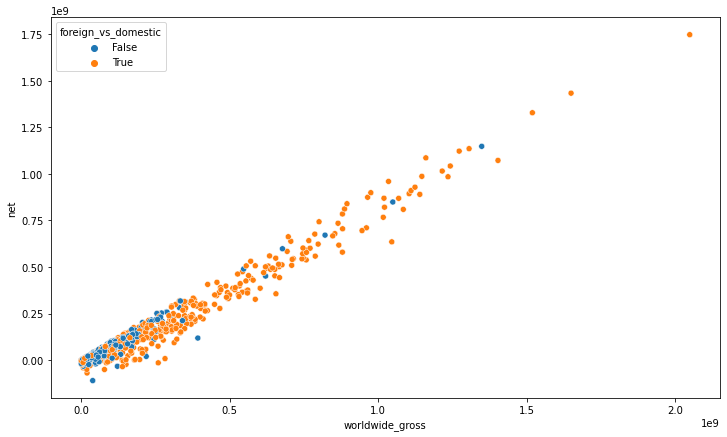

In [105]:
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(x='worldwide_gross', y='net', hue='foreign_vs_domestic', data=df)
plt.show()
ax.set_xlabel = 'World Gross'
ax.set_ylabel = 'Profit'
ax.set_title = 'Profits by Foreign- and Domestic-Dominated Gross'


In [57]:
foreign_gross_mean = foreign_gt_domestic['worldwide_gross'].mean()
domestic_gross_mean = domestic_gt_foreign['worldwide_gross'].mean()

foreign_gross_mean

275290630.63366336

In [59]:
foreign_gt_domestic.worldwide_gross.max()

2048134200.0

In [60]:
foreign_gt_domestic['bin'] = pd.cut(foreign_gt_domestic['worldwide_gross'], bins=range(0,2048134200,204813420))
foreign_gt_domestic['bin']

<ipython-input-60-78fb7dc9447c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_gt_domestic['bin'] = pd.cut(foreign_gt_domestic['worldwide_gross'], bins=range(0,2048134200,204813420))


0              (0, 204813420]
3              (0, 204813420]
6      (204813420, 409626840]
7              (0, 204813420]
8              (0, 204813420]
                ...          
901            (0, 204813420]
902            (0, 204813420]
903    (204813420, 409626840]
904    (204813420, 409626840]
906    (204813420, 409626840]
Name: bin, Length: 505, dtype: category
Categories (9, interval[int64]): [(0, 204813420] < (204813420, 409626840] < (409626840, 614440260] < (614440260, 819253680] ... (1024067100, 1228880520] < (1228880520, 1433693940] < (1433693940, 1638507360] < (1638507360, 1843320780]]

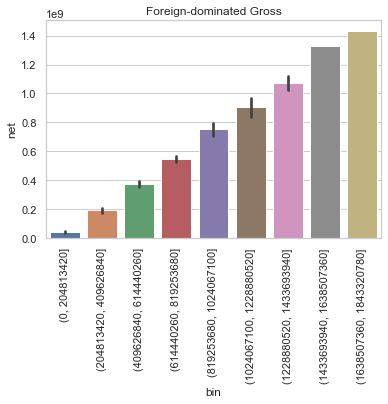

In [128]:
# looking at just foreign-dominated: the worldwide gross has a nice linear relation
# with profits!
sns.barplot(x = 'bin', y = 'net', data = foreign_gt_domestic).set(title='Foreign-dominated Gross')
plt.xticks(rotation=90)
plt.show()

In [63]:
domestic_gt_foreign['worldwide_gross'].max()


1348258224.0

In [64]:
# looking at just domestic-dominated, less-clear linear relationship. Overall these worldwide grossranges
#are less than in foreign-dominated (I set the bins the same, and as the higher of the two)

domestic_gt_foreign['bin'] = pd.cut(domestic_gt_foreign['worldwide_gross'], bins=range(0,2048134200,204813420))
domestic_gt_foreign['bin']



<ipython-input-64-16dfc88fb549>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic_gt_foreign['bin'] = pd.cut(domestic_gt_foreign['worldwide_gross'], bins=range(0,2048134200,204813420))


1              (0, 204813420]
2              (0, 204813420]
4              (0, 204813420]
5              (0, 204813420]
9      (204813420, 409626840]
                ...          
896    (204813420, 409626840]
897            (0, 204813420]
905            (0, 204813420]
907            (0, 204813420]
908            (0, 204813420]
Name: bin, Length: 404, dtype: category
Categories (9, interval[int64]): [(0, 204813420] < (204813420, 409626840] < (409626840, 614440260] < (614440260, 819253680] ... (1024067100, 1228880520] < (1228880520, 1433693940] < (1433693940, 1638507360] < (1638507360, 1843320780]]

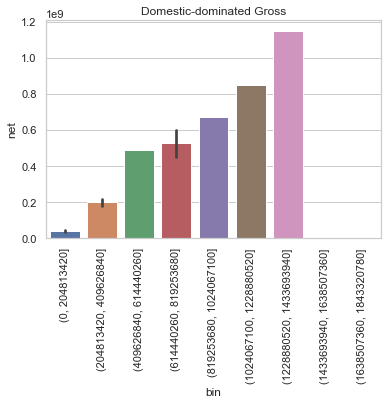

In [129]:
sns.barplot(x = 'bin', y = 'net', data = domestic_gt_foreign).set(title='Domestic-dominated Gross')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# would be lovely if i could figure out how to stack these two graphs for a comparison! 
#below chart kinda does this

In [66]:
domestic_gt_foreign['bin'].dropna()

1              (0, 204813420]
2              (0, 204813420]
4              (0, 204813420]
5              (0, 204813420]
9      (204813420, 409626840]
                ...          
896    (204813420, 409626840]
897            (0, 204813420]
905            (0, 204813420]
907            (0, 204813420]
908            (0, 204813420]
Name: bin, Length: 404, dtype: category
Categories (9, interval[int64]): [(0, 204813420] < (204813420, 409626840] < (409626840, 614440260] < (614440260, 819253680] ... (1024067100, 1228880520] < (1228880520, 1433693940] < (1433693940, 1638507360] < (1638507360, 1843320780]]

<ipython-input-130-0132416c5c12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_gt_domestic['ds'] = 'foreign_gt_domestic'
<ipython-input-130-0132416c5c12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic_gt_foreign['ds'] = 'domestic_gt_foreign'


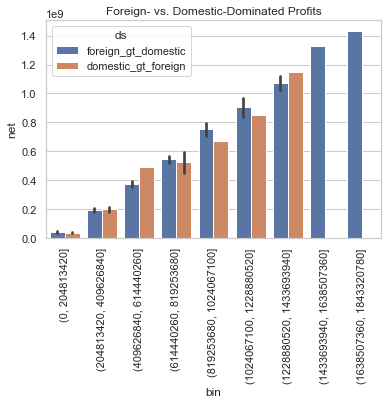

In [130]:
foreign_gt_domestic['ds'] = 'foreign_gt_domestic'
domestic_gt_foreign['ds'] = 'domestic_gt_foreign'
dss = pd.concat([foreign_gt_domestic, domestic_gt_foreign])
sns.barplot(x='bin', y='net', hue='ds', data=dss).set(title='Foreign- vs. Domestic-Dominated Profits')
plt.xticks(rotation=90)
plt.show()


#ds2['ds'] = 'dataset_2'
#ds1['ds'] = 'dataset_1'
#dss = pd.concat([ds1, ds2])
#sns.barplot(x='day', y='total_bill', hue='ds', data=dss)

In [69]:
foreign_vs_domestic = df.foreign_gross.gt(df.domestic_gross)

df['foreign_vs_domestic'] = foreign_vs_domestic 

df['foreign_vs_domestic']

0       True
1      False
2      False
3       True
4      False
       ...  
904     True
905    False
906     True
907    False
908    False
Name: foreign_vs_domestic, Length: 909, dtype: bool

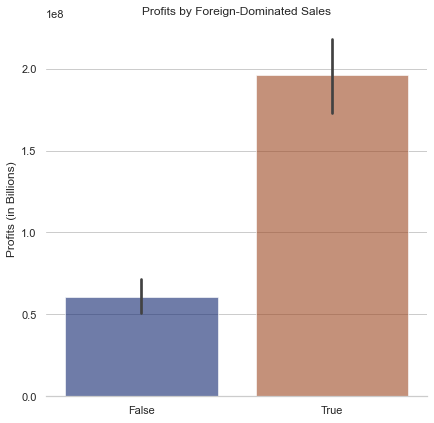

In [119]:
sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x='foreign_vs_domestic', y="net",
    palette="dark", alpha=.6, height=6
).set(title='Profits by Foreign-Dominated Sales')
g.despine(left=True)
g.set_axis_labels("", "Profits (in Billions)")




# foreign-dominated genres

In [71]:
foreign_gt_domestic['genre_list'] = foreign_gt_domestic.genres.str.split(",")

foreign_gt_domestic

<ipython-input-71-3659dc2e03bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_gt_domestic['genre_list'] = foreign_gt_domestic.genres.str.split(",")


id                                title                      genres  \
0    42.0               The Legend of Hercules    Action,Adventure,Fantasy   
3    61.0                            Hereafter       Drama,Fantasy,Romance   
6    16.0                   Sex and the City 2        Comedy,Drama,Romance   
7    11.0                   Going the Distance              Comedy,Romance   
8    51.0                          Remember Me               Drama,Romance   
..    ...                                  ...                         ...   
901  81.0                             Suspiria      Fantasy,Horror,Mystery   
902  35.0                         Bachelorette              Comedy,Romance   
903  99.0                             Geostorm      Action,Sci-Fi,Thriller   
904  13.0  Cloudy with a Chance of Meatballs 2  Adventure,Animation,Comedy   
906  96.0                    The Expendables 3   Action,Adventure,Thriller   

     release_year release_date   studio  vote_average  popularity  \
0          2014.0   2014-01-10     LG/S           4.5      13.754   
3          2010.0   2010-10-22       WB           5.9       7.886   
6          2010.0   2010-05-27  WB (NL)           5.9       9.986   
7          2010.0   2010-09-03  WB (NL)           6.0       8.281   
8          2010.0   2010-03-12     Sum.           7.1      11.453   
..            ...          ...      ...           ...         ...   
901        2018.0   2018-10-26   Amazon           7.0      16.925   
902        2012.0   2012-09-06     RTWC           5.4       7.050   
903        2017.0   2017-10-20       WB           5.8      13.653   
904        2013.0   2013-09-27     Sony           6.4      18.335   
906        2014.0   2014-08-15      LGF           6.1      18.797   

     domestic_gross  foreign_gross  ...  runtime_minutes  average_rating  \
0        18848538.0     40104781.0  ...             99.0             4.2   
3        32746941.0     75913329.0  ...            129.0             6.5   
6        95347692.0    199333086.0  ...            146.0             4.4   
7        17804299.0     25799691.0  ...            102.0             6.3   
8        19068240.0     37437880.0  ...            113.0             7.1   
..              ...            ...  ...              ...             ...   
901       2483472.0      4551143.0  ...            152.0             6.8   
902        446770.0     12130631.0  ...             87.0             5.3   
903      33700160.0    187095849.0  ...            109.0             5.3   
904     119793567.0    154599082.0  ...             95.0             6.4   
906      39322544.0    170138834.0  ...            126.0             6.1   

      votes  worldwide_gross  original_language  world_gross          net  \
0     50352       58953319.0                 en   58953319.0  -11046681.0   
3     87288      108660270.0                 en  108660270.0   58660270.0   
6     69199      294680778.0                 en  294680778.0  199680778.0   
7     54421       43603990.0                 en   43603990.0   11603990.0   
8    129443       56506120.0                 en   56506120.0   40506120.0   
..      ...              ...                ...          ...          ...   
901   37360        7034615.0                 en    7034615.0  -12965385.0   
902   43131       12577401.0                 en   12577401.0    9577401.0   
903   78287      220796009.0                 en  220796009.0  120796009.0   
904   81010      274392649.0                 en  274392649.0  196392649.0   
906  156432      209461378.0                 en  209461378.0  109461378.0   

                        bin                   ds  \
0            (0, 204813420]  foreign_gt_domestic   
3            (0, 204813420]  foreign_gt_domestic   
6    (204813420, 409626840]  foreign_gt_domestic   
7            (0, 204813420]  foreign_gt_domestic   
8            (0, 204813420]  foreign_gt_domestic   
..                      ...                  ...   
901          (0, 204813420]  foreign_gt

In [92]:
foreign_gt_domestic['genre_list'].dropna(inplace=True)

<ipython-input-92-8049a494bf0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_gt_domestic['genre_list'].dropna(inplace=True)


In [72]:
exploded_genres = foreign_gt_domestic.explode('genre_list')
exploded_genres 


id                                title                      genres  \
0    42.0               The Legend of Hercules    Action,Adventure,Fantasy   
0    42.0               The Legend of Hercules    Action,Adventure,Fantasy   
0    42.0               The Legend of Hercules    Action,Adventure,Fantasy   
3    61.0                            Hereafter       Drama,Fantasy,Romance   
3    61.0                            Hereafter       Drama,Fantasy,Romance   
..    ...                                  ...                         ...   
904  13.0  Cloudy with a Chance of Meatballs 2  Adventure,Animation,Comedy   
904  13.0  Cloudy with a Chance of Meatballs 2  Adventure,Animation,Comedy   
906  96.0                    The Expendables 3   Action,Adventure,Thriller   
906  96.0                    The Expendables 3   Action,Adventure,Thriller   
906  96.0                    The Expendables 3   Action,Adventure,Thriller   

     release_year release_date studio  vote_average  popularity  \
0          2014.0   2014-01-10   LG/S           4.5      13.754   
0          2014.0   2014-01-10   LG/S           4.5      13.754   
0          2014.0   2014-01-10   LG/S           4.5      13.754   
3          2010.0   2010-10-22     WB           5.9       7.886   
3          2010.0   2010-10-22     WB           5.9       7.886   
..            ...          ...    ...           ...         ...   
904        2013.0   2013-09-27   Sony           6.4      18.335   
904        2013.0   2013-09-27   Sony           6.4      18.335   
906        2014.0   2014-08-15    LGF           6.1      18.797   
906        2014.0   2014-08-15    LGF           6.1      18.797   
906        2014.0   2014-08-15    LGF           6.1      18.797   

     domestic_gross  foreign_gross  ...  runtime_minutes  average_rating  \
0        18848538.0     40104781.0  ...             99.0             4.2   
0        18848538.0     40104781.0  ...             99.0             4.2   
0        18848538.0     40104781.0  ...             99.0             4.2   
3        32746941.0     75913329.0  ...            129.0             6.5   
3        32746941.0     75913329.0  ...            129.0             6.5   
..              ...            ...  ...              ...             ...   
904     119793567.0    154599082.0  ...             95.0             6.4   
904     119793567.0    154599082.0  ...             95.0             6.4   
906      39322544.0    170138834.0  ...            126.0             6.1   
906      39322544.0    170138834.0  ...            126.0             6.1   
906      39322544.0    170138834.0  ...            126.0             6.1   

      votes  worldwide_gross  original_language  world_gross          net  \
0     50352       58953319.0                 en   58953319.0  -11046681.0   
0     50352       58953319.0                 en   58953319.0  -11046681.0   
0     50352       58953319.0                 en   58953319.0  -11046681.0   
3     87288      108660270.0                 en  108660270.0   58660270.0   
3     87288      108660270.0                 en  108660270.0   58660270.0   
..      ...              ...                ...          ...          ...   
904   81010      274392649.0                 en  274392649.0  196392649.0   
904   81010      274392649.0                 en  274392649.0  196392649.0   
906  156432      209461378.0                 en  209461378.0  109461378.0   
906  156432      209461378.0                 en  209461378.0  109461378.0   
906  156432      209461378.0                 en  209461378.0  109461378.0   

                        bin                   ds genre_list  
0            (0, 204813420]  foreign_gt_domestic     Action  
0            (0, 204813420]  foreign_gt_domestic  Adventure  
0            (0, 204813420]  foreign_gt_domestic    Fantasy  
3            (0, 204813420]  foreign_gt_domestic      Drama  
3            (0, 204813420]  foreign_gt_domestic    Fantasy  
..                      ...                  ...       

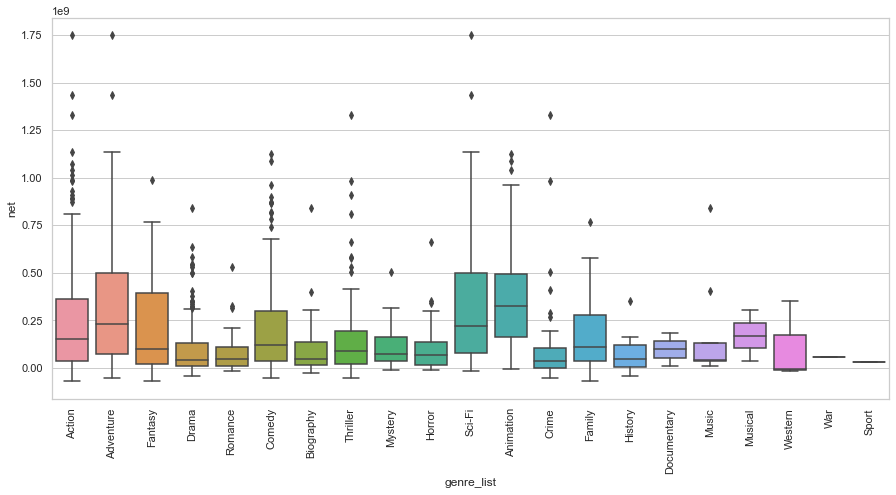

In [131]:
fig, ax = plt.subplots(figsize=(15,7))

sns.boxplot(x='genre_list', y='net', data=exploded_genres)
plt.xticks(rotation=90)
plt.show()

In [73]:
top_genres = exploded_genres.loc[(exploded_genres['genre_list'] == 'Action') | 
                                 (exploded_genres['genre_list'] == 'Adventure')|
                                 (exploded_genres['genre_list'] == 'Animation')|
                                 (exploded_genres['genre_list'] == 'Sci-Fi')|
                                 (exploded_genres['genre_list'] == 'Comedy')|
                                 (exploded_genres['genre_list'] == 'Family')
                                ]


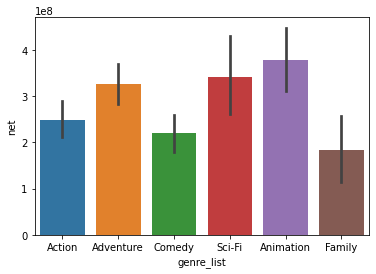

In [74]:
sns.barplot(x='genre_list', y = 'net', data=top_genres)
plt.show()

In [75]:
genre_net = pd.DataFrame().assign(Genres=exploded_genres['genre_list'], Net=exploded_genres['net'])
genre_net

Genres          Net
0       Action  -11046681.0
0    Adventure  -11046681.0
0      Fantasy  -11046681.0
3        Drama   58660270.0
3      Fantasy   58660270.0
..         ...          ...
904  Animation  196392649.0
904     Comedy  196392649.0
906     Action  109461378.0
906  Adventure  109461378.0
906   Thriller  109461378.0

[1370 rows x 2 columns]

# Looking at top genre groupings by top exploded genres


In [76]:
exploded_families = exploded_genres.loc[exploded_genres['genre_list'] == 'Family']

In [77]:
exploded_families['genres'].value_counts()

Adventure,Family,Fantasy      7
Animation,Comedy,Family       5
Action,Adventure,Family       4
Adventure,Comedy,Family       3
Adventure,Drama,Family        2
Comedy,Family                 2
Adventure,Animation,Family    2
Drama,Family                  1
Action,Drama,Family           1
Action,Comedy,Family          1
Comedy,Family,Romance         1
Action,Family,Fantasy         1
Name: genres, dtype: int64

In [131]:
# only looking at family permutations
net_exploded_families = exploded_families['genres'].groupby(exploded_families['net']).sum().tail(5)
net_exploded_families

net
453700000.0                          Adventure,Family,Fantasy
474100000.0                           Animation,Comedy,Family
559200000.0    Animation,Comedy,FamilyAnimation,Comedy,Family
578500000.0                           Action,Adventure,Family
771100000.0                          Adventure,Family,Fantasy
Name: genres, dtype: object

In [78]:
#only looking at action permutations
exploded_action = exploded_genres.loc[exploded_genres['genre_list'] == 'Action']

In [79]:
net_exploded_action = exploded_action['genres'].groupby(exploded_action['net']).sum().tail(5)
net_exploded_action

net
1.072414e+09    Action,Adventure,Sci-Fi
1.135773e+09    Action,Adventure,Sci-Fi
1.328723e+09      Action,Crime,Thriller
1.433855e+09    Action,Adventure,Sci-Fi
1.748134e+09    Action,Adventure,Sci-Fi
Name: genres, dtype: object

In [80]:
test3 = df.loc[df['genres'] == 'Action,Adventure,Sci-Fi']
test3['net'].sort_values(ascending=False)

893    1.748134e+09
130    1.433855e+09
168    1.148258e+09
149    1.135773e+09
827    1.072414e+09
360    1.015392e+09
725    9.287905e+08
527    8.940391e+08
788    8.900694e+08
850    8.491029e+08
448    7.348680e+08
432    7.051664e+08
637    6.415751e+08
795    5.979234e+08
123    5.478628e+08
336    5.444019e+08
60     5.378903e+08
407    5.089963e+08
416    4.889868e+08
20     4.511564e+08
605    4.429995e+08
685    4.292901e+08
787    3.858933e+08
434    3.645375e+08
192    3.631956e+08
616    3.014569e+08
680    2.773816e+08
728    2.357407e+08
876    2.305698e+08
121    2.210029e+08
79     2.200980e+08
684    2.191694e+08
308    1.954083e+08
515    1.679166e+08
503    1.508022e+08
400    9.347772e+07
656    8.723439e+07
764    5.676376e+07
249    1.953549e+07
131    7.778100e+06
683    2.982519e+06
Name: net, dtype: float64

In [81]:
df.loc[df['net'] == 1.147000e+09]

Empty DataFrame
Columns: [id, title, genres, release_year, release_date, studio, vote_average, popularity, domestic_gross, foreign_gross, production_budget, runtime_minutes, average_rating, votes, worldwide_gross, original_language, net, foreign_vs_domestic]
Index: []

In [82]:
#only looking at adventure permutations
exploded_adventure = exploded_genres.loc[exploded_genres['genre_list'] == 'Adventure']

In [83]:
net_exploded_adventure = exploded_adventure['genres'].groupby(exploded_action['net']).sum().tail(5)
net_exploded_adventure

net
1.042521e+09    Action,Adventure,Animation
1.072414e+09       Action,Adventure,Sci-Fi
1.135773e+09       Action,Adventure,Sci-Fi
1.433855e+09       Action,Adventure,Sci-Fi
1.748134e+09       Action,Adventure,Sci-Fi
Name: genres, dtype: object

In [84]:
# only looking at animation, sci-fi, comedy, permutations
exploded_animation = exploded_genres.loc[exploded_genres['genre_list'] == 'Animation']
exploded_sci_fi = exploded_genres.loc[exploded_genres['genre_list'] == 'Sci-Fi']
exploded_comedy = exploded_genres.loc[exploded_genres['genre_list'] == 'Comedy']
net_exploded_animation = exploded_animation['genres'].groupby(exploded_action['net']).sum().tail(5)
net_exploded_sci_fi = exploded_sci_fi['genres'].groupby(exploded_sci_fi['net']).sum().tail(5)
net_exploded_comedy = exploded_sci_fi['genres'].groupby(exploded_comedy['net']).sum().tail(5)

In [85]:
net_exploded_animation

net
4.380684e+08    Action,Adventure,Animation
4.695863e+08    Action,Adventure,Animation
4.871278e+08    Action,Adventure,Animation
5.148375e+08    Action,Adventure,Animation
1.042521e+09    Action,Adventure,Animation
Name: genres, dtype: object

In [86]:
net_exploded_sci_fi

net
1.015392e+09    Action,Adventure,Sci-Fi
1.072414e+09    Action,Adventure,Sci-Fi
1.135773e+09    Action,Adventure,Sci-Fi
1.433855e+09    Action,Adventure,Sci-Fi
1.748134e+09    Action,Adventure,Sci-Fi
Name: genres, dtype: object

In [87]:
net_exploded_comedy

net
-6540817.0         Action,Comedy,Sci-Fi
 2295028.0         Action,Comedy,Sci-Fi
 61162106.0     Adventure,Comedy,Sci-Fi
 154041804.0       Action,Comedy,Sci-Fi
Name: genres, dtype: object

In [88]:
exploded_genres['genre_list'].value_counts()

Action         215
Adventure      208
Drama          194
Comedy         152
Thriller       100
Sci-Fi          69
Animation       68
Crime           63
Fantasy         56
Romance         49
Horror          49
Mystery         45
Biography       37
Family          30
History         17
Music            9
Western          3
Musical          2
Documentary      2
War              1
Sport            1
Name: genre_list, dtype: int64

In [89]:
AAA  = foreign_gt_domestic.loc[foreign_gt_domestic['genres'] == 'Action,Adventure,Animation']

In [90]:
AAS  = foreign_gt_domestic.loc[foreign_gt_domestic['genres'] == 'Action,Adventure,Sci-Fi']
AAS

id                                  title                   genres  \
60   31.0                 The Amazing Spider-Man  Action,Adventure,Sci-Fi   
79   75.0                     Mad Max: Fury Road  Action,Adventure,Sci-Fi   
121  72.0                            Pacific Rim  Action,Adventure,Sci-Fi   
123  55.0             X-Men: Days of Future Past  Action,Adventure,Sci-Fi   
130  34.0                         Jurassic World  Action,Adventure,Sci-Fi   
131  14.0                            John Carter  Action,Adventure,Sci-Fi   
149  13.0         Jurassic World: Fallen Kingdom  Action,Adventure,Sci-Fi   
192  62.0                              Bumblebee  Action,Adventure,Sci-Fi   
308  42.0                     X-Men: First Class  Action,Adventure,Sci-Fi   
336  16.0    Captain America: The Winter Soldier  Action,Adventure,Sci-Fi   
360  48.0                             Iron Man 3  Action,Adventure,Sci-Fi   
400  32.0                             Battleship  Action,Adventure,Sci-Fi   
407  56.0               The Amazing Spider-Man 2  Action,Adventure,Sci-Fi   
416  39.0  The Hunger Games: Mockingjay - Part 2  Action,Adventure,Sci-Fi   
432  99.0                 Spider-Man: Homecoming  Action,Adventure,Sci-Fi   
434  93.0                      X-Men: Apocalypse  Action,Adventure,Sci-Fi   
448  38.0        The Hunger Games: Catching Fire  Action,Adventure,Sci-Fi   
503  79.0                       Star Trek Beyond  Action,Adventure,Sci-Fi   
515  93.0                               Oblivion  Action,Adventure,Sci-Fi   
527  37.0        Transformers: Age of Extinction  Action,Adventure,Sci-Fi   
605  29.0                           Man of Steel  Action,Adventure,Sci-Fi   
616   8.0                          The Wolverine  Action,Adventure,Sci-Fi   
637  62.0  The Hunger Games: Mockingjay - Part 1  Action,Adventure,Sci-Fi   
656  35.0                              Predators  Action,Adventure,Sci-Fi   
680  68.0                Star Trek Into Darkness  Action,Adventure,Sci-Fi   
683  91.0                      Jupiter Ascending  Action,Adventure,Sci-Fi   
684  33.0           Independence Day: Resurgence  Action,Adventure,Sci-Fi   
685  78.0                       Ready Player One  Action,Adventure,Sci-Fi   
725  64.0         Transformers: Dark of the Moon  Action,Adventure,Sci-Fi   
728  13.0                  G.I. Joe: Retaliation  Action,Adventure,Sci-Fi   
764  66.0                                Riddick  Action,Adventure,Sci-Fi   
787  33.0          Transformers: The Last Knight  Action,Adventure,Sci-Fi   
788  17.0             Captain America: Civil War  Action,Adventure,Sci-Fi   
827   4.0                Avengers: Age of Ultron  Action,Adventure,Sci-Fi   
876  10.0     Captain America: The First Avenger  Action,Adventure,Sci-Fi   
893   7.0                 Avengers: Infinity War  Action,Adventure,Sci-Fi   

     release_year release_date studio  vote_average  popularity  \
60         2012.0   2012-07-04   Sony           6.5      24.391   
79         2015.0   2015-05-15     WB           7.4      28.099   
121        2013.0   2013-07-12     WB           6.8      16.759   
123        2014.0   2014-05-23    Fox           7.5      41.867   
130        2015.0   2015-06-12   Uni.           6.6      20.709   
131        2012.0   2012-03-09     BV           6.1      18.549   
149        2018.0   2018-06-22   Uni.           6.5      34.958   
192        2018.0   2018-12-21   Par.           6.5      43.078   
308        2011.0   2011-06-03    Fox           7.2       1.447   
336        2014.0   2014-04-04     BV           7.7      18.073   
360        2013.0   2013-05-03     BV           6.9      32.093   
400        2012.0   2012-05-18   Uni.           5.6      21.742   
407        2014.0   2014-05-02   Sony           6.4      20.847   
416        2015.0   2015-11-18    LGF           6.8      19.487   
432        2017.0   2017-07-07   Sony           7.4      46.775   
434        2016.0   2016-05-27    Fox           6.5      39.293   
448        2013.0 

In [91]:
top_genre_combos = foreign_gt_domestic.copy()

In [92]:
top_genre_combos = top_genre_combos.loc[(top_genre_combos['genres'] == 'Action,Adventure,Sci-Fi') | 
                     (top_genre_combos['genres'] == 'Action,Comedy,Sci-Fi') | 
                     (top_genre_combos['genres'] == 'Action,Adventure,Animation') | 
                     (top_genre_combos['genres'] == 'Adventure,Family,Fantasy')]
top_genre_combos['genres'].value_counts()

Action,Adventure,Sci-Fi       36
Action,Adventure,Animation    11
Adventure,Family,Fantasy       7
Action,Comedy,Sci-Fi           3
Name: genres, dtype: int64

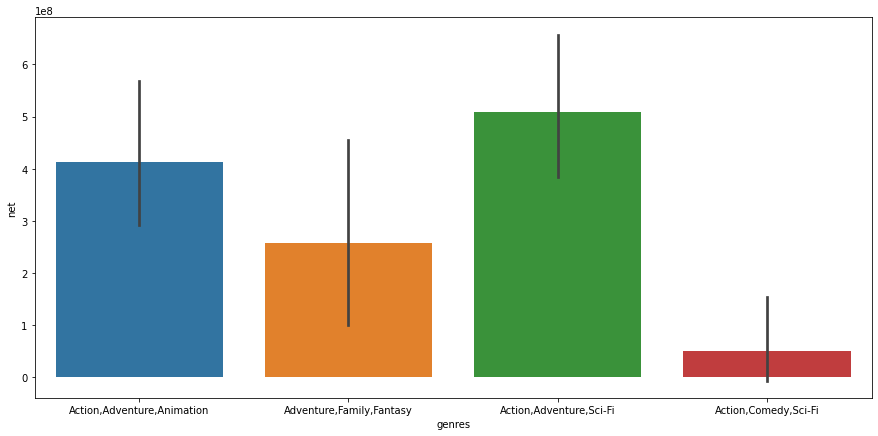

In [93]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='genres', y='net', data=top_genre_combos)
plt.show()


In [94]:
foreign_gt_domestic.to_csv("/Users/admin/Documents/Flatiron/Movie_Production_Recommendations/Lou/data/foreign_gt_domestic.csv")